In [720]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [721]:
#LOADING DATASET
df = pd.read_csv(r'C:\Users\Sanchit\Downloads\day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [723]:
df.isnull().sum() #THERE ARE NO NULL VALUES.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [724]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [725]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [726]:
#DROPPING FEATURES THAT DON'T PROVIDE ANY VALUE TO MODEL. 
df= df.drop(columns=['instant','dteday','registered','casual'],axis = 1)
df
#drop dteday coz we have col for year and month.
#drop registered and casual column because we already have total count.


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


# EDA

In [727]:
#MAPPING SEASONS ACCORDING TO DICTIONARY.
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [728]:
df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [729]:
#MONTHLY COUNT OF USERS.
df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [730]:
#MAPPING WEEKDAYS ACCORDING TO DICTIONARY.
df['weekday']=df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
df['weekday'].value_counts()

Monday       105
Saturday     105
Sunday       105
Tuesday      104
Friday       104
Thrusday     104
Wednesday    103
Name: weekday, dtype: int64

In [731]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [732]:
#MAPPING WEATHER ACCORDING TO DICTIONARY.
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
df['weathersit'].value_counts()

Clear                463
Mist & Cloudy        246
Light Snow & Rain     21
Name: weathersit, dtype: int64

In [733]:
##MAPPING MONTHS ACCORDING TO DICTIONARY.
df['mnth'] = df['mnth'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df['mnth'].value_counts()

aug     62
dec     62
oct     62
jan     62
may     62
mar     62
jul     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: mnth, dtype: int64

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


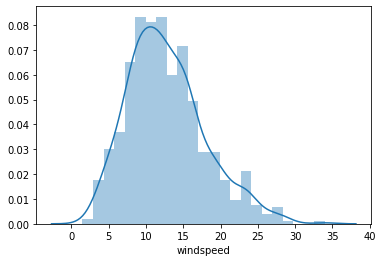

In [734]:
print(df['windspeed'].describe())
sns.distplot(df['windspeed'])
#AVG WIND IS DISTRIBUTED AROUND 10.
#MEDIAN IS 12.12.

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


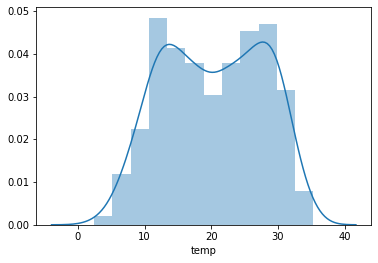

In [735]:
print(df['temp'].describe())
sns.distplot(df['temp'])
#TEMPERATURE VAIRES A LOT.
#MEDIAN BEING 20.46.

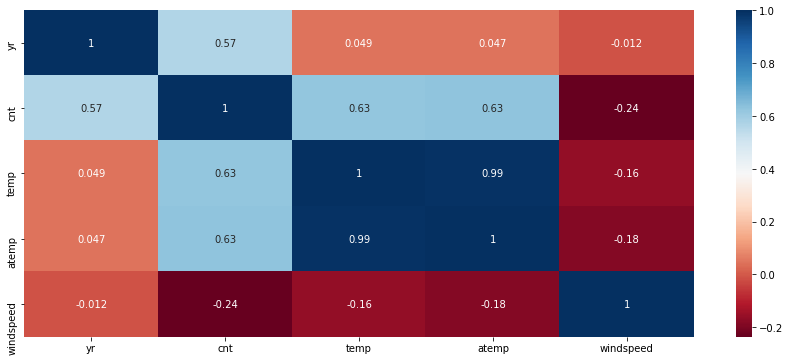

In [736]:
#CONTINUOUS VARIABLES
plt.figure(figsize=(15,6))
sns.heatmap(df[['yr','cnt','temp','atemp','windspeed']].corr(),annot=True,cmap="RdBu")
#WINDSPEED IS IN NEGATIVE CORRELATION WITH EVERYTHING.

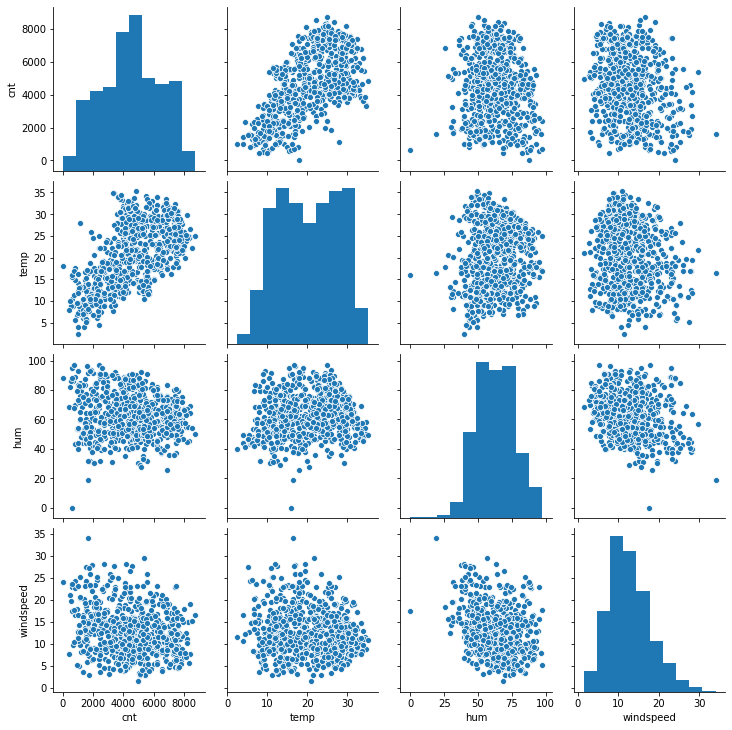

In [737]:
#CONTINUOUS VARIABLES 
sns.pairplot(data=df, vars=['cnt', 'temp', 'hum','windspeed'])

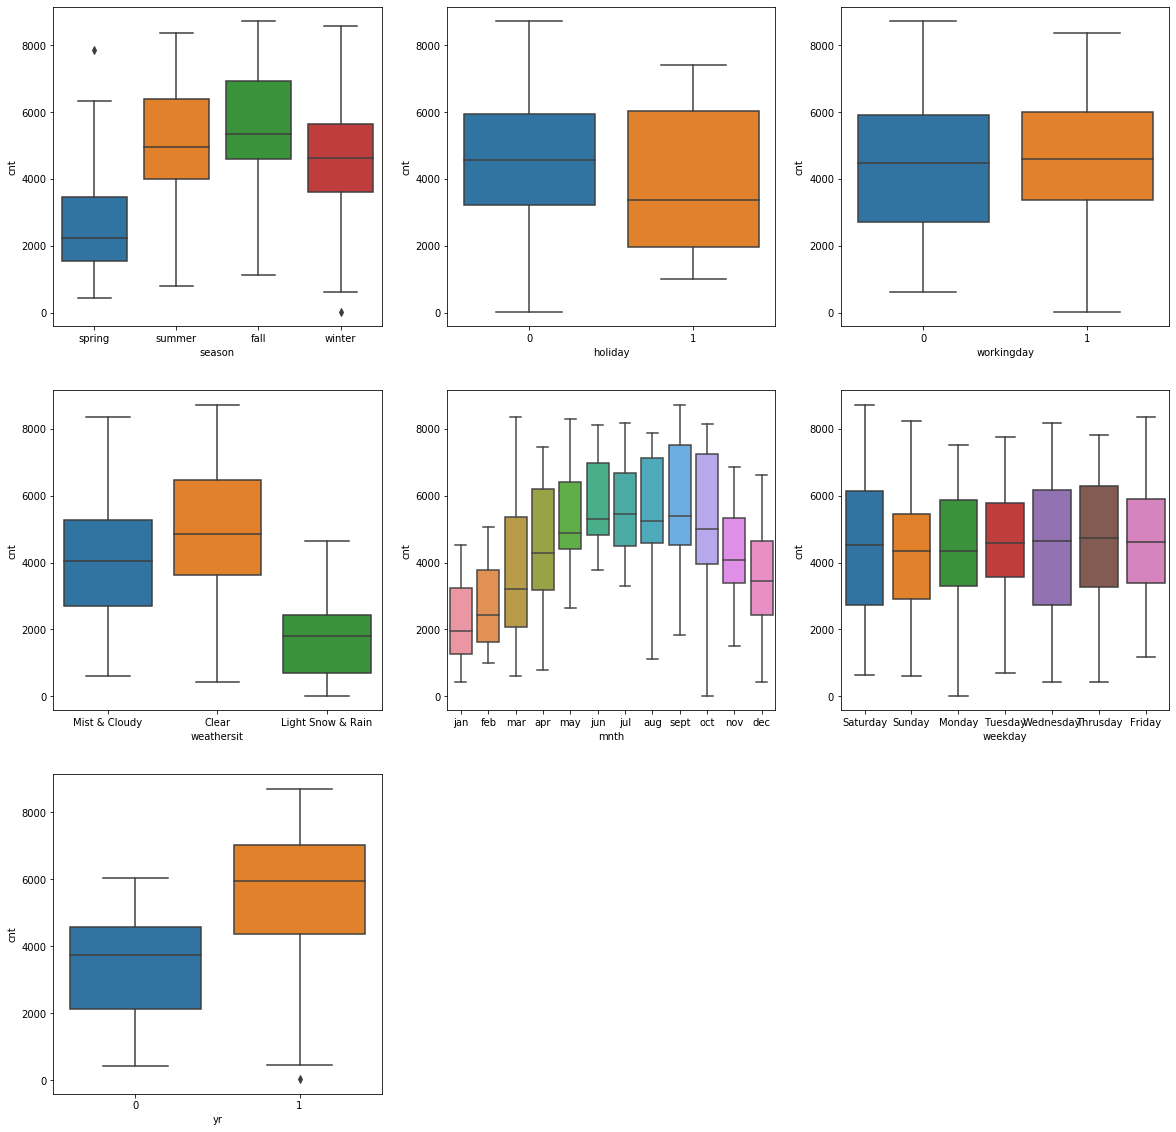

In [738]:
#PLOTTING ALL CATEGORICAL VARIABLES WITH COUNT.
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt', data=df)
plt.show()

# creating dummy variables  

In [739]:
#CONVERTING TO-BE DUMMY VARIABLES FROM INT TO OBJECT.
df['season']=df['season'].astype('object')
df['weathersit']=df['weathersit'].astype('object')
df['mnth']=df['mnth'].astype('object')
df['weekday']=df['weekday'].astype('object')

In [740]:
df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [741]:
#DUMMY VARIABLES
Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit']) # keeping all weathers as they could have a big impact on rentals.
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [742]:
#COMBINIG DUMMY VARIABLE IN TO DATAFRAME.
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    object 
 1   yr                 730 non-null    int64  
 2   mnth               730 non-null    object 
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    object 
 5   workingday         730 non-null    int64  
 6   weathersit         730 non-null    object 
 7   temp               730 non-null    float64
 8   atemp              730 non-null    float64
 9   hum                730 non-null    float64
 10  windspeed          730 non-null    float64
 11  cnt                730 non-null    int64  
 12  spring             730 non-null    uint8  
 13  summer             730 non-null    uint8  
 14  winter             730 non-null    uint8  
 15  Clear              730 non-null    uint8  
 16  Light Snow & Rain  730 non

In [743]:
#DROPPING the orginal columns season,weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [744]:
#SPLITTING DATASET.
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [745]:
scaler = MinMaxScaler() #NORMALIZATION

In [746]:
#SCALING CONTINUOUS VARIABLES.
num_var = ['temp','atemp','hum','windspeed','cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

F:\ anaconda python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\ anaconda python\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [747]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.497640,0.230920,0.258317,...,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.234026,0.421834,0.438138,...,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.344984,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.502113,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.676868,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [748]:
#ASSINGING FEATURES TO X AND Y TRAINING DATA.
y_train = df_train.pop('cnt')
X_train = df_train

In [749]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,0,0,1,0,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,1,0,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [750]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [751]:
y_train.describe()

count    511.000000
mean       0.497640
std        0.234026
min        0.000000
25%        0.344984
50%        0.502113
75%        0.676868
max        1.000000
Name: cnt, dtype: float64

In [752]:
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: cnt, dtype: float64

In [753]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# RFE 

In [754]:
#LINEAR RERESSION
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [755]:
#
rfe= RFE(lm, 15)
rfe =rfe.fit(X_train,y_train)

In [756]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('Clear', True, 1),
 ('Light Snow & Rain', True, 1),
 ('Mist & Cloudy', False, 4),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', False, 10),
 ('Thrusday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 13),
 ('aug', False, 8),
 ('dec', True, 1),
 ('feb', False, 9),
 ('jan', False, 15),
 ('jul', True, 1),
 ('jun', False, 16),
 ('mar', True, 1),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sept', True, 1)]

In [757]:
selected_rfe = X_train.columns[rfe.support_]
selected_rfe

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'Saturday', 'dec', 'jul', 'mar', 'nov', 'sept'],
      dtype='object')

In [758]:
#X_train_rfe = X_train[colm] # Creating X_test dataframe with RFE selected variables

In [759]:
#FUNCTION TO CALCULATE VARISNCE INFLATION FACTOR.
def vif(cols):   
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [760]:
#MODEL
def build_model(cols):
    # Add a constant
    X_train_sm = sm.add_constant(X_train[cols])
    # Create a first fitted model
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

# MODEL 1

In [761]:
cols=['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'Saturday', 'dec', 'jul', 'mar', 'nov', 'sept']
build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          5.72e-185
Time:                        21:21:42   Log-Likelihood:                 483.64
No. Observations:                 511   AIC:                            -935.3
Df Residuals:                     495   BIC:                            -867.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2731      0.04

,Features,VIF
2,atemp,1236.56
1,temp,1199.18
3,hum,20.41
4,windspeed,5.53
7,Clear,3.28
5,spring,3.01
6,winter,2.81
0,yr,2.09
13,nov,1.86
11,jul,1.49


# MODEL 2

In [762]:
## removing atemp due to high VIF and P-value , temperature has 0.63 correrlation with total count.
cols=['yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'Saturday', 'dec', 'jul', 'mar', 'nov', 'sept']
build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.77e-185
Time:                        21:21:42   Log-Likelihood:                 482.13
No. Observations:                 511   AIC:                            -934.3
Df Residuals:                     496   BIC:                            -870.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2795      0.04

,Features,VIF
1,temp,19.37
2,hum,19.11
3,windspeed,5.21
6,Clear,3.20
4,spring,3.00
5,winter,2.79
0,yr,2.08
12,nov,1.86
10,jul,1.49
9,dec,1.38


# MODEL 3

In [763]:
# DROP SATURDAY DUE TO HIGH P-VALUE.
cols=['yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'dec', 'jul', 'mar', 'nov', 'sept']
build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.62e-186
Time:                        21:21:42   Log-Likelihood:                 481.02
No. Observations:                 511   AIC:                            -934.0
Df Residuals:                     497   BIC:                            -874.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2839      0.04

,Features,VIF
1,temp,19.36
2,hum,19.02
3,windspeed,5.18
6,Clear,3.19
4,spring,3.00
5,winter,2.79
0,yr,2.08
11,nov,1.86
9,jul,1.49
8,dec,1.38


# MODEL 4

In [764]:
#DROP HUMIDITY DUE TO HIGH VIF.
cols=['yr', 'temp', 'windspeed', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'dec', 'jul', 'mar', 'nov', 'sept']
build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          6.26e-184
Time:                        21:21:42   Log-Likelihood:                 472.93
No. Observations:                 511   AIC:                            -919.9
Df Residuals:                     498   BIC:                            -864.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1636      0.02

,Features,VIF
1,temp,6.24
2,windspeed,5.03
5,Clear,2.82
4,winter,2.35
0,yr,2.08
3,spring,1.91
10,nov,1.82
8,jul,1.43
7,dec,1.32
11,sept,1.24


# MODEL 5

In [765]:
#DROP WINDSPEED DUE TO HIGH  VIF.
cols=['yr', 'temp', 'spring', 'winter', 'Clear',
       'Light Snow & Rain',  'dec', 'jul', 'mar', 'nov', 'sept']
build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          6.34e-182
Time:                        21:21:43   Log-Likelihood:                 465.38
No. Observations:                 511   AIC:                            -906.8
Df Residuals:                     499   BIC:                            -855.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1093      0.02

,Features,VIF
1,temp,3.94
4,Clear,2.80
3,winter,2.34
0,yr,2.07
9,nov,1.79
2,spring,1.52
7,jul,1.38
6,dec,1.32
10,sept,1.23
8,mar,1.16


In [766]:
#I tried a final model till here , results were , R2(test)= 0.804, mean_sq_error = 0.0105. ,but after dropping the performance became better. 

# MODEL 6

In [767]:
#DROP JULY COZ OF P-VALUE.
cols=['yr', 'temp', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'dec', 'mar', 'nov', 'sept']
build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.7
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.68e-181
Time:                        21:21:43   Log-Likelihood:                 461.07
No. Observations:                 511   AIC:                            -900.1
Df Residuals:                     500   BIC:                            -853.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1283      0.02

,Features,VIF
1,temp,3.40
4,Clear,2.80
3,winter,2.27
0,yr,2.07
8,nov,1.79
2,spring,1.50
6,dec,1.32
9,sept,1.18
7,mar,1.16
5,Light Snow & Rain,1.08


# MODEL 7

In [768]:
#DROP DECEMBER 
cols=['yr', 'temp', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'mar', 'nov', 'sept']
build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          5.66e-180
Time:                        21:21:43   Log-Likelihood:                 455.07
No. Observations:                 511   AIC:                            -890.1
Df Residuals:                     501   BIC:                            -847.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1118      0.02

,Features,VIF
1,temp,3.40
4,Clear,2.80
0,yr,2.06
3,winter,1.91
7,nov,1.65
2,spring,1.43
8,sept,1.17
6,mar,1.15
5,Light Snow & Rain,1.08


# MODEL 8

In [769]:
#DROP NOVEMBER 
cols=['yr', 'temp', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'mar', 'sept']
build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.29e-178
Time:                        21:21:43   Log-Likelihood:                 448.96
No. Observations:                 511   AIC:                            -879.9
Df Residuals:                     502   BIC:                            -841.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0962      0.02

,Features,VIF
1,temp,3.36
4,Clear,2.73
0,yr,2.06
2,spring,1.42
3,winter,1.30
7,sept,1.16
6,mar,1.15
5,Light Snow & Rain,1.08


# MODEL EVALUATION 

In [770]:
# A regression function to for test data.
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

#FEATURES FROM OUR FINAL MODEL. 
cols = ['yr', 'temp', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'mar', 'sept']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.09620624726577603 [ 0.24027788  0.4379751  -0.1552761   0.06423721  0.08009497 -0.20267958
  0.0699085   0.07137319]


In [771]:
#CHECKING IF TRAINING PREDICTION IS SAME AS OF OLS.
y_pred_train = lr.predict(X_train[cols])
r2_score(y_train,y_pred_train)

0.8151936143123315

Text(0.5, 0, 'Errors')

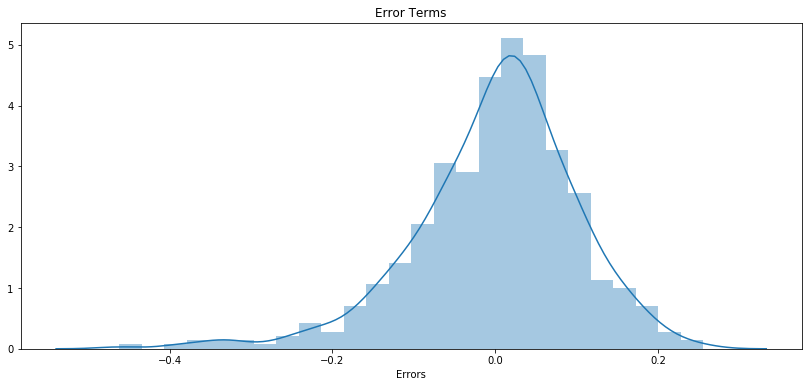

In [772]:
#RESIDUAL ANALYSIS
plt.figure(figsize=(14,6))
residual = (y_train-y_pred_train)
sns.distplot(residual)
plt.title('Error Terms')
plt.xlabel('Errors')

#ERRORS ARE NOT NORMALLY DISTRIBUTED.

In [773]:
# there is no multicollinearity existing between the predictor variables.
vif(cols)
# ALL FEATURES HAVE VIF BELOW 5.

,Features,VIF
1,temp,3.36
4,Clear,2.73
0,yr,2.06
2,spring,1.42
3,winter,1.30
7,sept,1.16
6,mar,1.15
5,Light Snow & Rain,1.08


In [774]:
# SCALING TEST DATA, AS HERE WE ONLY TRANFORM DATA , BECAUSE FITTING LEADS TO DATA LEAKAGE.
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

F:\ anaconda python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\ anaconda python\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [775]:
# FEATURES FOR X AND y.
y_test = df_test.pop('cnt')
X_test = df_test

In [776]:
new=['yr', 'temp', 'spring', 'winter', 'Clear',
       'Light Snow & Rain', 'mar', 'sept']

X_test=X_test[new]
# Adding constant variable to test data.
X_test_lr8 = sm.add_constant(X_test)

In [777]:
y_pred = lr.predict(X_test[cols])
r2_score(y_test,y_pred)

0.8014683082535782

In [778]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.010737274025126928

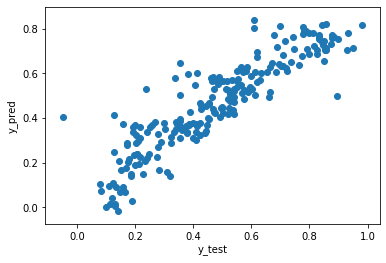

In [779]:
plt.scatter(y_test,y_pred)
plt.ylabel("y_pred")
plt.xlabel("y_test")
plt.show()

In [780]:
r2 = 0.8092111835899191
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print ("test set adjusted_r2",adjusted_r2)
print("training set adjusted_r2 :0.812")

test set adjusted_r2 0.8019430382028684
training set adjusted_r2 :0.812


#  F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistic, leads to a more significant model.
    
   F-statistic: 276.8
   Prob (F-statistic): 1.29e-178


# The equation of best fitted model:
cnt = 0.09620624726577603 + (year*0.2403)+(temp*0.4380) + (spring*-0.1553)+ (winter*0.0642) + (Clear*0.0801)+(Light Snow & Rain * -0.2027) + (mar * 0.0699) + (sept*0.0714) 

# Conclusion 

    temp, coefficient 0.4380 indicates that a unit increase in temp, increases the bike hire numbers by 0.4380 units.

    spring, coefficient -0.1553 indicates that a unit increase in spring variable, decreases the bike hire numbers by -0.1553 units.
    
    winter,an increse the bike hire numbers by 0.0642 units.

    yr:  a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.

    clear, a unit increase in clear variable wrt. weather , increases the bike hire numbers by 0.0801 units.
    
    Light Snow & Rain , a unit increase in Light Snow & Rain variable wrt. weather , decreases the bike hire numbers by -0.2027 units.
    
    mar, a unit increase in clear variable , increases the bike hire numbers by 0.0699 units.
    
    sept , a unit increase in clear variable , increases the bike hire numbers by 0.0714 units.



